### 결정 트리 모델의 시각화

- Graphviz 패키지: 그래프 기반의 dot파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지(파이썬으로 개발 X >> 윈도우에 설치 후 파이썬 Wrapper 모듈 별도 설치 필요)


- 사이킷런은 Graphviz 패키지와 쉽게 인터페이스할 수 있도록 export_graphviz() 제공


- 학습이 완료된 Estimator, 피처 이름 리스트, 레이블 이름 리스트를 입력하면 결정 트리 규칙을 시각화해줌


- https://graphviz.org/download

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


#### iris 데이터셋을 결정트리를 이용해 학습한 뒤 어떻게 규칙이 만들어지는지 확인해보자

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- export_graphviz()는 Graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성함


- 학습이 완료된 Estimator, dt_clf / output파일명 / 결정클래스 명칭, iris_data.target_names / 피처 명칭, iris_data.feature_names 입력

In [3]:
from sklearn.tree import export_graphviz

#export_graphviz의 호출 결과로 out_file로 지정된 tree.dot파일을 생성함
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

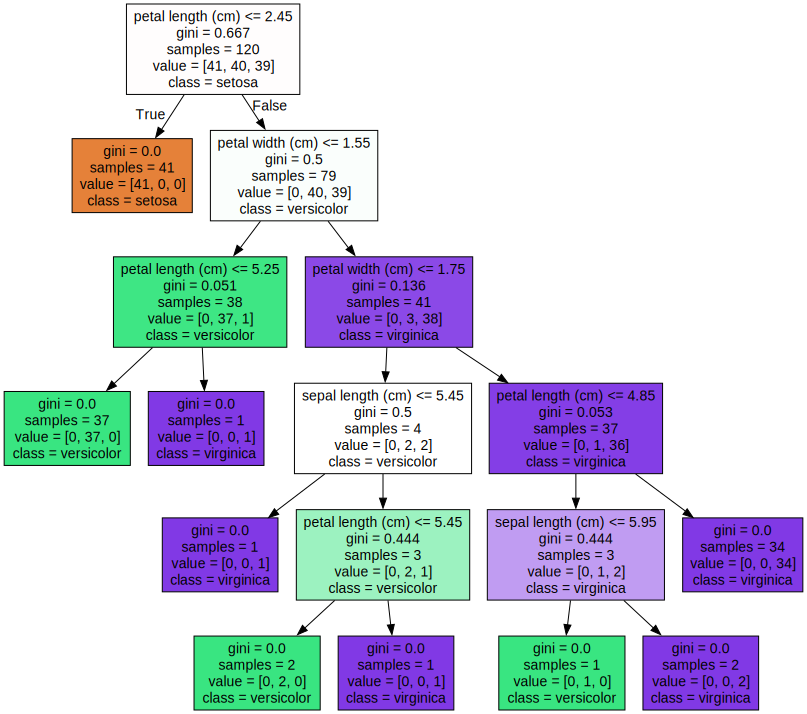

In [4]:
import graphviz
#위에서 생성된  tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

###### 각 규칙에 따라 브랜치 노드와 말단 리프 노드가 어떻게 구성되는지 한눈에 알 수 있음


1. 리프 노드: 더이상 자식 노드가 없는 노드

- 최종 클래스값이 결정되는 노드, 리프노드가 되려면 오직 하나의 클래스값으로 최종 데이터가 구성되거나 리프노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면됨

2. 브랜치 노드: 자식 노드가 있는 노드

- 자식 노드를 만들기 위한 분할 규칙 조건을 가짐

- 2번 노드는 모든 데이터가 Setosa로 결정되므로 리프 노드가 됨(41개의 샘플 모두 Setosa, 지니 지수는 0)

- 3번 노드는 79개의 샘플 중 Versicolor 40개, virginica 39개, 지니 지수는 0.5로 높기 때문에 다음 브랜치 노드로 분기할 규칙이 필요

... 반복

- 각 노드의 색깔은 iris 데이터의 레이블값을 의미, 색깔이 짙어질수록 지니 지수가 낮고 해당 레이블에 속하는 샘플이 많다는 뜻

> #### 결정 트리는 완벽하게 클래스값을 구별해낼 때까지 노드를 생성하므로 모델이 쉽게 과적합될 수 있음
> #### - 결정트리 알고리즘을 제어하는 대부분의 하이퍼 파라미터는 과적합을 제어하기 위한 용도

##### max_depth를 제한 없음에서 3개로 설정하면 더 간단한 결정 트리가 만들어짐

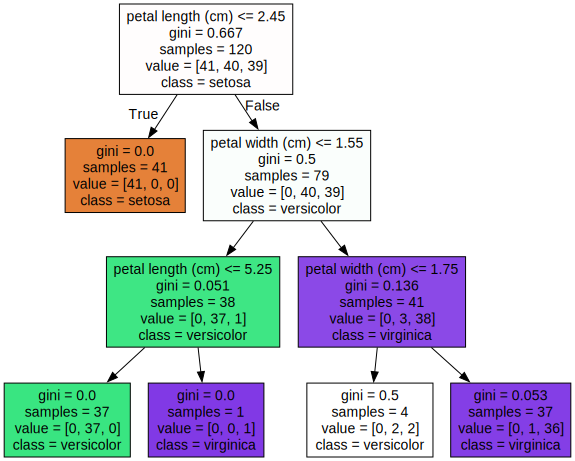

In [6]:
dt_clf_max = DecisionTreeClassifier(random_state=156, max_depth=3)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf_max.fit(X_train, y_train)

export_graphviz(dt_clf_max, out_file='tree.dot', class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph_max = f.read()
graphviz.Source(dot_graph_max)

##### min_samples_split을 4로 설정하기

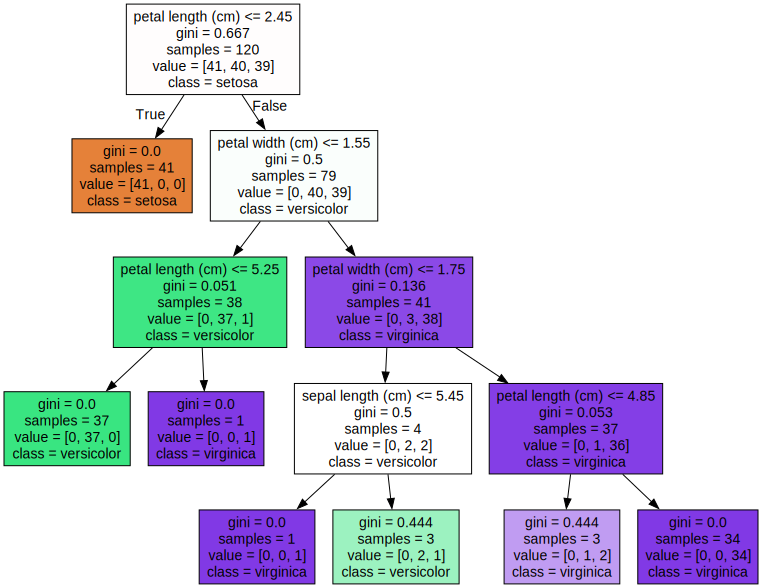

In [11]:
dt_clf_min_split = DecisionTreeClassifier(random_state=156, min_samples_split=4)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf_min_split.fit(X_train, y_train)

export_graphviz(dt_clf_min_split, out_file='tree.dot', class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph_min_split = f.read()
graphviz.Source(dot_graph_min_split)

- 맨 아래 지니 지수가 0.444인 노드들을 보면 노드 안에 value가 [0,2,1]과 [0,1,2]로 서로 상이한 클래스값이 있어도 더 이상 분할하지 않고 리프 노드가 되었음 >> 분할하기 위한 최소 샘플 개수가 4개이기 때문


- 자연스럽게 트리 깊이도 줄었고 더 간결해짐

##### min_samples_leaf를 기본 1에서 4로 변경하기

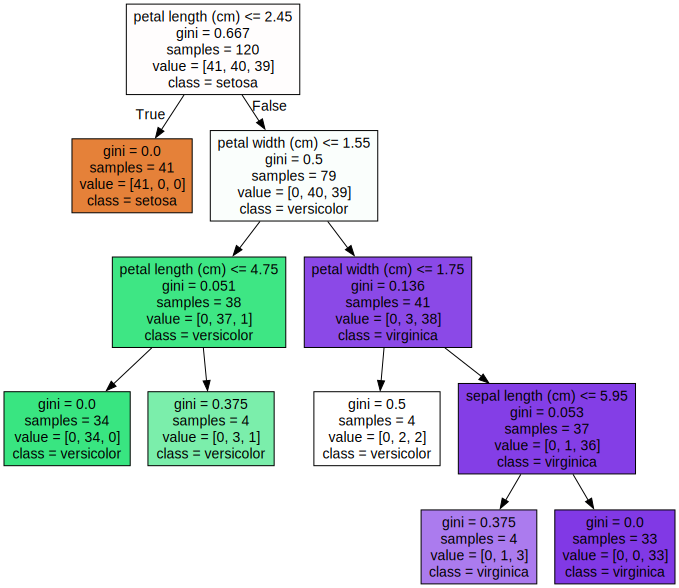

In [12]:
dt_clf_min_leaf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf_min_leaf.fit(X_train, y_train)

export_graphviz(dt_clf_min_leaf, out_file='tree.dot', class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph_min_leaf = f.read()
graphviz.Source(dot_graph_min_leaf)

- min_samples_leaf값을 키우면 분할 조건이 어려워져서 리프 노드가 될 수 있는 조건이 상대적으로 완화됨


- 노드가 분할할 때, 왼쪽 오른쪽 자식 노드가 모두 샘플 데이터 건수 4 이상을 가진 노드가 되어야 하므로 기본값인 1로 설정하는 것보다 조건을 만족하기 어려워짐


- 자연스럽게 브랜치 노드가 줄어들고 더 간결해짐

> 결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요함. 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는데 기여하며, 간결하고 이상치에 강한 모델을 만들 수 있기 때문

##### feature_importances_

- 피처가 트리 분할 시 정보 이득 지수가 지니 지수를 얼마나 효율적으로 개선시켰는지를 정규화한 값


- ndarray형태로 값을 반환하며 피처 순서대로 값이 할당됨


- 일반적으로 값이 높을수록 해당 피처의 중요도가 높다는 의미

##### iris데이터셋에서 피처별로 중요도를 추출해보고 막대그래프로 시각화해보자

Feature importance: 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot: >

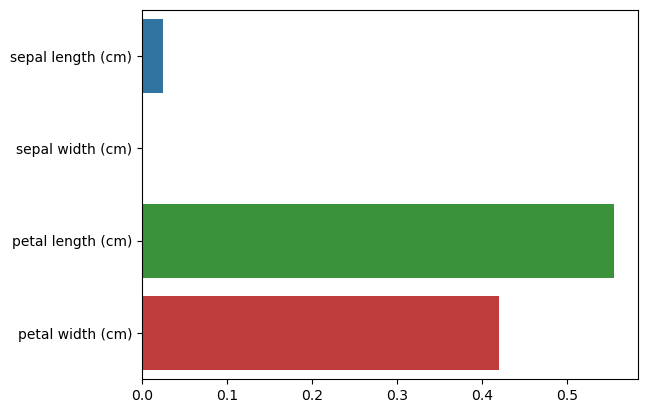

In [15]:
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

import seaborn as sns
import numpy as np

#feature importance 추출
print("Feature importance: \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
#feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

- petal_length가 피처 중요도가 가장 높음

> 규칙 트리의 시각화와 feature_importances_ 속성을 통해 결정 트리 알고리즘을 직관적으로 이해할 수 있다.

In [1]:
pip install --upgrade jupyter

Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda update nbconvert